In [2]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [3]:
os.getcwd()

'C:\\Users\\oscar'

In [4]:
os.chdir('C:\\Users\\oscar\Downloads')

In [5]:
dataset = pd.read_excel('Telco_customer_churn (3).xlsx')

In [6]:
dataset.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
dataset.isna().any()

CustomerID           False
Count                False
Country              False
State                False
City                 False
Zip Code             False
Lat Long             False
Latitude             False
Longitude            False
Gender               False
Senior Citizen       False
Partner              False
Dependents           False
Tenure Months        False
Phone Service        False
Multiple Lines       False
Internet Service     False
Online Security      False
Online Backup        False
Device Protection    False
Tech Support         False
Streaming TV         False
Streaming Movies     False
Contract             False
Paperless Billing    False
Payment Method       False
Monthly Charges      False
Total Charges        False
Churn Label          False
Churn Value          False
Churn Score          False
CLTV                 False
Churn Reason          True
dtype: bool

In [8]:
dataset.drop(dataset[['Churn Score', 'CLTV', 'Churn Reason']],axis=1, inplace=True)

In [9]:
dataset['Total Charges'] = pd.to_numeric(dataset['Total Charges'],errors='coerce')
dataset['Total Charges'] = dataset['Total Charges'].astype("float")

In [10]:
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)


In [11]:
dataset.isna().any()

CustomerID           False
Count                False
Country              False
State                False
City                 False
Zip Code             False
Lat Long             False
Latitude             False
Longitude            False
Gender               False
Senior Citizen       False
Partner              False
Dependents           False
Tenure Months        False
Phone Service        False
Multiple Lines       False
Internet Service     False
Online Security      False
Online Backup        False
Device Protection    False
Tech Support         False
Streaming TV         False
Streaming Movies     False
Contract             False
Paperless Billing    False
Payment Method       False
Monthly Charges      False
Total Charges        False
Churn Label          False
Churn Value          False
dtype: bool

In [12]:
dataset.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value'],
      dtype='object')

In [13]:
dataset.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.294193,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2264.998567,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,19.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,402.000000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1401.000000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.500000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8685.000000,1.000000


In [14]:
dataset.dtypes


CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
dtype: object

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [16]:
dataset["Churn Value"].value_counts()



0    5174
1    1869
Name: Churn Value, dtype: int64

[Text(0, 0.5, 'Percent')]

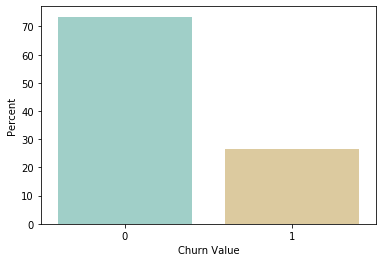

In [17]:
ax = sns.barplot(x="Churn Value", y="Zip Code", data=dataset, palette= 'BrBG_r',estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

In [18]:
dataset['Total Charges'].isna().sum()

0

In [19]:
dataset.groupby(['Churn Label']).mean()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value
Churn Label,,,,,,,,
No,1.0,93518.212215,36.287436,-119.804838,37.569965,61.265124,2554.757248,0.0
Yes,1.0,93532.352595,36.268614,-119.782388,17.979133,74.441332,1531.796148,1.0


[Text(0, 0.5, 'Percent')]

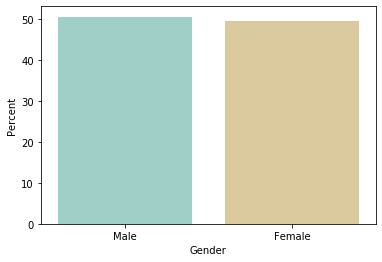

In [20]:
ax = sns.barplot(x="Gender", y="Zip Code", data=dataset, palette= 'BrBG_r',estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

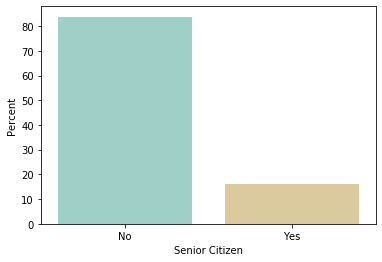

In [21]:
ax = sns.barplot(x="Senior Citizen", y="Zip Code", data=dataset, palette= 'BrBG_r',estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

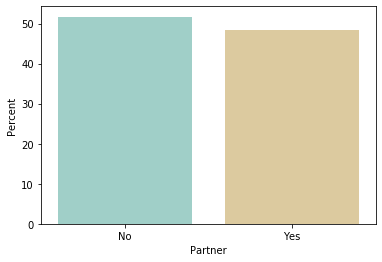

In [22]:
ax = sns.barplot(x="Partner", y="Zip Code", data=dataset, palette= 'BrBG_r',estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

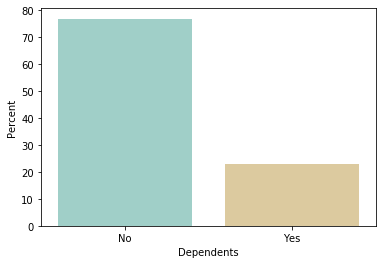

In [23]:
ax = sns.barplot(x="Dependents", y="Zip Code", data=dataset, palette= 'BrBG_r',estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

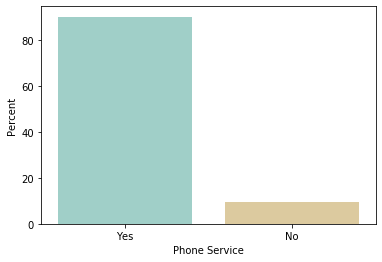

In [24]:
ax = sns.barplot(x="Phone Service", y="Zip Code", data=dataset, palette= 'BrBG_r',estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

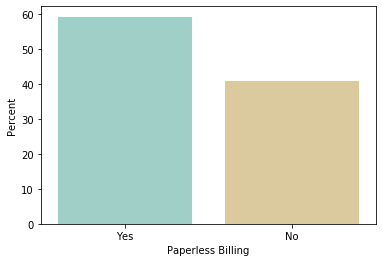

In [25]:
ax = sns.barplot(x="Paperless Billing", y="Zip Code", data=dataset, palette= 'BrBG_r', estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

In [26]:
dataset[["Gender","Churn Value"]].groupby('Gender').mean()

,Churn Value
Gender,
Female,0.269209
Male,0.261603


In [27]:
dataset[["Senior Citizen","Churn Value"]].groupby('Senior Citizen').mean()

,Churn Value
Senior Citizen,
No,0.236062
Yes,0.416813


In [28]:
dataset[["Partner","Churn Value"]].groupby('Partner').mean()

,Churn Value
Partner,
No,0.329580
Yes,0.196649


In [29]:
dataset[["Dependents","Churn Value"]].groupby('Dependents').mean()

,Churn Value
Dependents,
No,0.325517
Yes,0.065151


In [30]:
dataset[["Phone Service","Churn Value"]].groupby('Phone Service').mean()

,Churn Value
Phone Service,
No,0.249267
Yes,0.267096


In [31]:
dataset[["Paperless Billing","Churn Value"]].groupby('Paperless Billing').mean()

,Churn Value
Paperless Billing,
No,0.163301
Yes,0.335651


[Text(0, 0.5, 'Percent')]

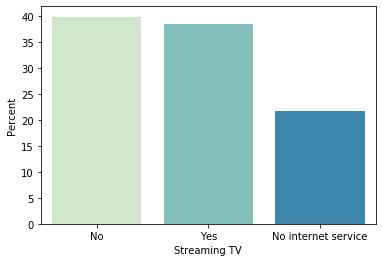

In [32]:
ax = sns.barplot(x="Streaming TV", y="Zip Code", data=dataset, palette= 'GnBu', estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

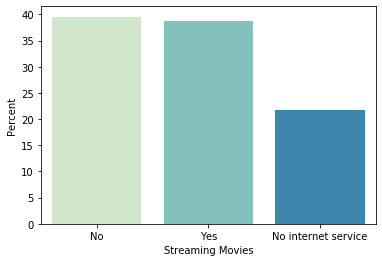

In [33]:
ax = sns.barplot(x="Streaming Movies", y="Zip Code", data=dataset, palette= 'GnBu', estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

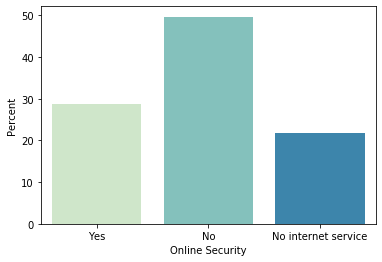

In [34]:
ax = sns.barplot(x="Online Security", y="Zip Code", data=dataset, palette= 'GnBu', estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

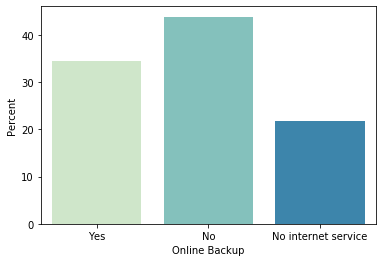

In [35]:
ax = sns.barplot(x="Online Backup", y="Zip Code", data=dataset, palette= 'GnBu', estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

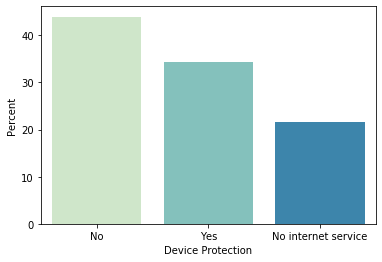

In [36]:
ax = sns.barplot(x="Device Protection", y="Zip Code", data=dataset, palette= 'GnBu', estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

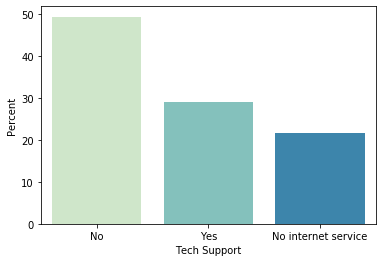

In [37]:
ax = sns.barplot(x="Tech Support", y="Zip Code", data=dataset, palette= 'GnBu', estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

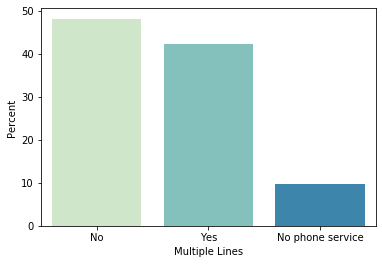

In [38]:
ax = sns.barplot(x="Multiple Lines", y="Zip Code", data=dataset, palette= 'GnBu', estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

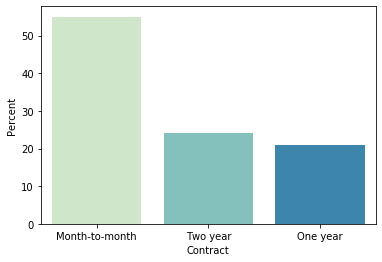

In [39]:
ax = sns.barplot(x="Contract", y="Zip Code", data=dataset, palette= 'GnBu', estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

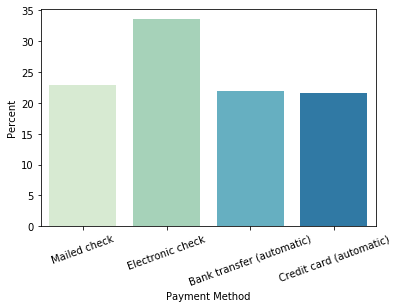

In [40]:
ax = sns.barplot(x="Payment Method", y="Zip Code", data=dataset, palette= 'GnBu', estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")
plt.xticks(rotation=20)
plt.show()

In [41]:
dataset[["Streaming TV","Churn Value"]].groupby('Streaming TV').mean()

,Churn Value
Streaming TV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [42]:
dataset[["Streaming Movies","Churn Value"]].groupby('Streaming Movies').mean()

,Churn Value
Streaming Movies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [43]:
dataset[["Online Security","Churn Value"]].groupby('Online Security').mean()

,Churn Value
Online Security,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [44]:
dataset[["Online Backup","Churn Value"]].groupby('Online Backup').mean()

,Churn Value
Online Backup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [45]:
dataset[["Device Protection","Churn Value"]].groupby('Device Protection').mean()

,Churn Value
Device Protection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [46]:
dataset[["Tech Support","Churn Value"]].groupby('Tech Support').mean()

,Churn Value
Tech Support,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [47]:
dataset[["Multiple Lines","Churn Value"]].groupby('Multiple Lines').mean()

,Churn Value
Multiple Lines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [48]:
dataset[["Contract","Churn Value"]].groupby('Contract').mean()

,Churn Value
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [49]:
dataset[["Payment Method","Churn Value"]].groupby('Payment Method').mean()

,Churn Value
Payment Method,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


[Text(0, 0.5, 'Churn Percentage')]

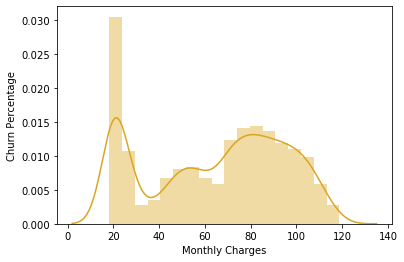

In [50]:
ax=sns.distplot(dataset["Monthly Charges"], color= 'goldenrod')
ax.set(ylabel = "Churn Percentage")

[Text(0, 0.5, 'Churn Percentage')]

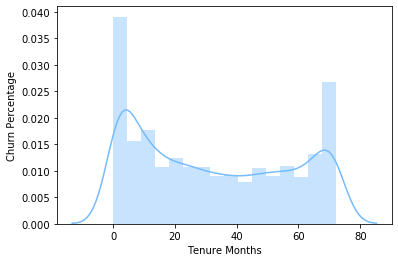

In [51]:
ax=sns.distplot(dataset["Tenure Months"], color= 'xkcd:sky blue')
ax.set(ylabel = "Churn Percentage")

[Text(0, 0.5, 'Churn Percentage')]

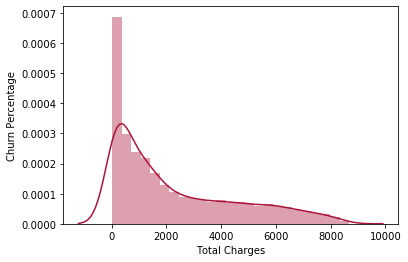

In [52]:
ax=sns.distplot(dataset["Total Charges"], color= '#ab1239')
ax.set(ylabel = "Churn Percentage")

In [53]:
dataset[["Monthly Charges","Churn Value"]].groupby('Churn Value').mean()

,Monthly Charges
Churn Value,
0,61.265124
1,74.441332


In [54]:
dataset[["Tenure Months","Churn Value"]].groupby('Churn Value').mean()

,Tenure Months
Churn Value,
0,37.569965
1,17.979133


In [55]:
dataset[["Total Charges","Churn Value"]].groupby('Churn Value').mean()

,Total Charges
Churn Value,
0,2554.757248
1,1531.796148


In [56]:
dataset['Tenure Months'].max()

72

In [57]:
dataset.drop(['Zip Code','CustomerID', 'Count', 'State', 'Country', 'Lat Long', 'Latitude', 'Longitude','City','Churn Label'], axis=1, inplace=True)

In [58]:
Variables = ['Gender','Senior Citizen','Partner','Dependents','Phone Service','Paperless Billing','Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Payment Method', 'Contract']
X = pd.get_dummies(dataset, columns=Variables, drop_first=True)

In [59]:
X

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Paperless Billing_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Contract_One year,Contract_Two year
0,2,53.85,108.0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,70.70,152.0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,8,99.65,820.0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
3,28,104.80,3046.0,1,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0
4,49,103.70,5036.0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
7039,24,84.80,1990.0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0
7040,72,103.20,7363.0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0
7041,11,29.60,346.0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [60]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dataset['Gender'] = labelencoder.fit_transform(dataset['Gender'])
dataset['Senior Citizen'] = labelencoder.fit_transform(dataset['Senior Citizen'])
dataset['Partner'] = labelencoder.fit_transform(dataset['Partner'])
dataset['Dependents'] = labelencoder.fit_transform(dataset['Dependents'])
dataset['Phone Service'] = labelencoder.fit_transform(dataset['Phone Service'])
dataset['Paperless Billing'] = labelencoder.fit_transform(dataset['Paperless Billing'])

In [61]:
dataset.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.0,1
1,0,0,0,1,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,152.0,1
2,0,0,0,1,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.0,1
3,0,0,1,1,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.0,1
4,1,0,0,1,49,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Bank transfer (automatic),103.70,5036.0,1


Text(0, 0.5, 'Churn Correlation')

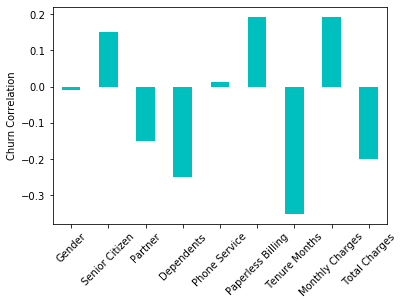

In [62]:
dataset3=dataset[['Gender','Senior Citizen', 'Partner','Dependents','Phone Service', 'Paperless Billing', 'Tenure Months', 'Monthly Charges','Total Charges']]

correlations = dataset3.corrwith(dataset['Churn Value'])

correlations.plot.bar(color= 'c', rot=45)

plt.ylabel("Churn Correlation")

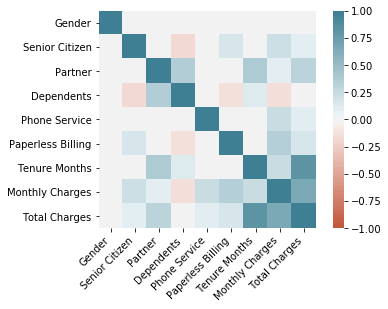

In [63]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

data = dataset3.corr()

ax = sns.heatmap(
    data, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [64]:
# Scaling Continuos Variables

sc = MinMaxScaler()
X['Tenure Months']=sc.fit_transform(dataset[['Tenure Months']])
X['Monthly Charges']=sc.fit_transform(dataset[['Monthly Charges']])
X['Total Charges']=sc.fit_transform(dataset[['Total Charges']])


In [65]:
X[['Tenure Months','Monthly Charges','Total Charges']]

,Tenure Months,Monthly Charges,Total Charges
0,0.027778,0.354229,0.010270
1,0.027778,0.521891,0.015347
2,0.111111,0.809950,0.092430
3,0.388889,0.861194,0.349296
4,0.680556,0.850249,0.578929
...,...,...,...
7038,1.000000,0.028856,0.161551
7039,0.333333,0.662189,0.227441
7040,1.000000,0.845274,0.847450
7041,0.152778,0.112935,0.037734


In [66]:


y = X['Churn Value']

X = X.drop(['Churn Value'], axis=1)

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)


sm = SMOTE(random_state=1234)

X_sm, y_sm = sm.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7043, 30)
Shape of X after SMOTE: (8278, 30)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Churn Value, dtype: float64

In [68]:
X_sm


,Tenure Months,Monthly Charges,Total Charges,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Paperless Billing_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Contract_One year,Contract_Two year
0,0.916667,0.453731,0.489961,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,0.319444,0.853731,0.282829,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
2,0.208333,0.778607,0.158435,1,1,1,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0.027778,0.571642,0.019617,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.222222,0.547264,0.135818,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8273,0.047638,0.705214,0.032098,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
8274,0.054305,0.252164,0.016301,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8275,0.277188,0.714207,0.206347,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8276,0.062052,0.559670,0.036585,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
y_sm


0       0
1       1
2       0
3       1
4       0
       ..
8273    1
8274    1
8275    1
8276    1
8277    1
Name: Churn Value, Length: 8278, dtype: int64

ROC AUC: 0.7786341677646025
f1_score: 0.6523702031602708
accuracy: 0.7814052519517388
precision: 0.564453125
recall: 0.7727272727272727
[[812 223]
 [ 85 289]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1035
           1       0.56      0.77      0.65       374

    accuracy                           0.78      1409
   macro avg       0.73      0.78      0.75      1409
weighted avg       0.81      0.78      0.79      1409



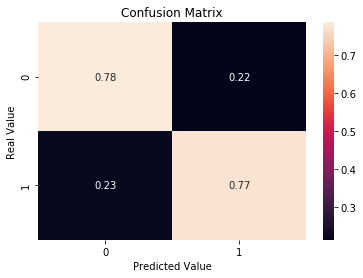

In [151]:
#LOGISTIC REGRESSION


log_model = LogisticRegression(C=10, penalty='l2', solver='newton-cg')
log_model.fit(X_sm, y_sm)
log_pred =  log_model.predict(X_test)

log_roc_auc_score_default = roc_auc_score(y_test, log_pred)
log_accuracy_default = accuracy_score(y_test, log_pred)

print("ROC AUC:",roc_auc_score(y_test, log_pred))
print("f1_score:",f1_score(y_test, log_pred))
print("accuracy:",metrics.accuracy_score(y_test, log_pred))
print("precision:",metrics.precision_score(y_test, log_pred))
print("recall:",metrics.recall_score(y_test, log_pred))

print(confusion_matrix(y_test, log_pred))
# classification report
print(classification_report(y_test, log_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, log_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()
                             


AxesSubplot(0.125,0.125;0.775x0.755)


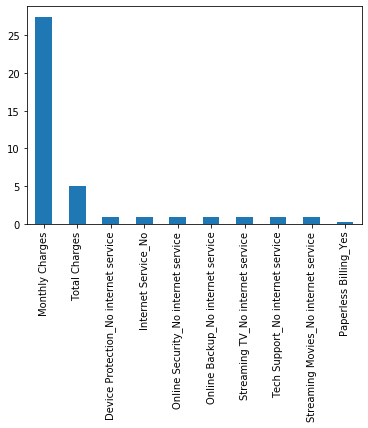

In [115]:
#LOGISTIC REGRESSION (PRO-CHURN)

# To get the weights of all the variables
weights = pd.Series(log_model.coef_[0],
                 index=X.columns.values)

print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


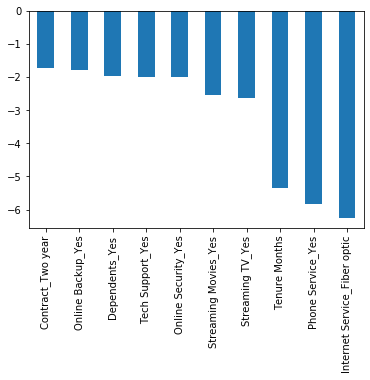

In [116]:
#LOGISTIC REGRESSION (ANTI-CHURN)
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [71]:
penalty= ['l2']

# Create regularization hyperparameter space
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

solver=['newton-cg', 'lbfgs', 'liblinear']

# Combine Parameters
parameters = dict(C=C, penalty=penalty, solver=solver)

lr_classifier = GridSearchCV(estimator = log_model,
                           param_grid = parameters,
                           scoring = "recall",
                           cv = 10,
                           n_jobs = -1)
lr_classifier.fit(X_sm, y_sm)

lr_classifier.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

ROC AUC: 0.7899919915265184
f1_score: 0.661588683351469
accuracy: 0.7792760823278921
precision: 0.5577981651376147
recall: 0.8128342245989305
[[794 241]
 [ 70 304]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1035
           1       0.56      0.81      0.66       374

    accuracy                           0.78      1409
   macro avg       0.74      0.79      0.75      1409
weighted avg       0.82      0.78      0.79      1409



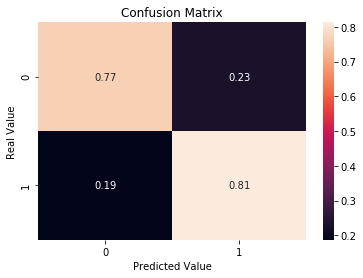

In [152]:
#RANDOM FOREST
RForest = RandomForestClassifier(n_estimators=300, max_depth=6)
RForest.fit(X_sm, y_sm)
forest_pred= RForest.predict(X_test)

RForest_roc_auc_score_default = roc_auc_score(y_test, forest_pred)
RForesr_accuracy_default = accuracy_score(y_test, forest_pred)

print("ROC AUC:",roc_auc_score(y_test, forest_pred))
print("f1_score:",f1_score(y_test, forest_pred))
print("accuracy:",metrics.accuracy_score(y_test, forest_pred))
print("precision:",metrics.precision_score(y_test, forest_pred))
print("recall:",metrics.recall_score(y_test, forest_pred))

print(confusion_matrix(y_test, forest_pred))

# classification report
print(classification_report(y_test, forest_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, forest_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

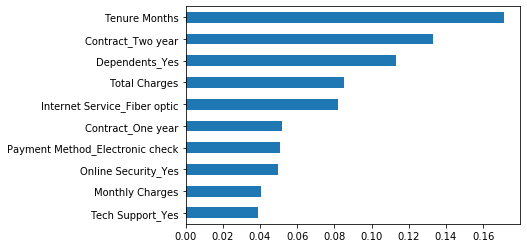

In [120]:
#RANDOM FOREST
importances = RForest.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [73]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
clf = GridSearchCV(estimator=RForest, param_grid=parameters, n_jobs=-1, cv=5)
clf.fit(X_sm, y_sm)
clf.best_params_
clf.best_score_

0.844534714012581

ROC AUC: 0.7748249761037483
f1_score: 0.6372045220966085
accuracy 0.7494677075940384
precision 0.5175292153589316
recall 0.8288770053475936
[[746 289]
 [ 64 310]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1035
           1       0.52      0.83      0.64       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



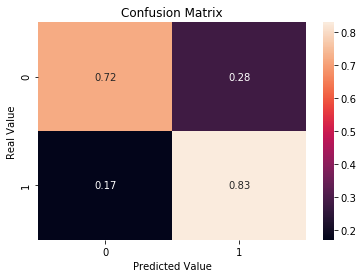

In [153]:
#SUPPORT VECTOR MACHINE


# Applying Support Vector Machine algorithm
from sklearn.svm import SVC  
svclassifier = SVC(C= 10, gamma= 0.01, kernel= 'rbf')  
svclassifier.fit(X_sm, y_sm)  
# Predicting part, applying the model to predict
y_pred = svclassifier.predict(X_test)  

print("ROC AUC:",roc_auc_score(y_test, y_pred))
print("f1_score:",f1_score(y_test, y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

C:\Users\oscar\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { objetctive } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC AUC: 0.7437740577126766
f1_score: 0.6159509202453988
accuracy: 0.7778566359119943
precision: 0.5691609977324263
recall: 0.6711229946524064
[[845 190]
 [123 251]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57    

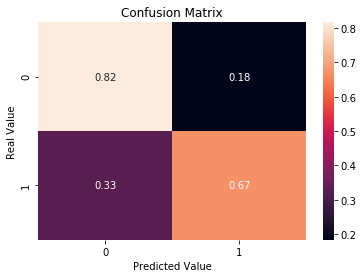

In [154]:
#XGBOOST


xgb_model = XGBClassifier(objetctive='binary:logistic',min_child_weight=3, max_depth=8, learning_rate=0.25, gamma=0.0, colsample_bytree=0.5)

xgb_model.fit(X_sm, y_sm)

y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

print("ROC AUC:",roc_auc_score(y_test, predictions))
print("f1_score:",f1_score(y_test, predictions))
print("accuracy:",metrics.accuracy_score(y_test, predictions))
print("precision:",metrics.precision_score(y_test, predictions))
print("recall:", metrics.recall_score(y_test, predictions))

print(confusion_matrix(y_test, predictions))

# classification report
print(classification_report(y_test, predictions))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

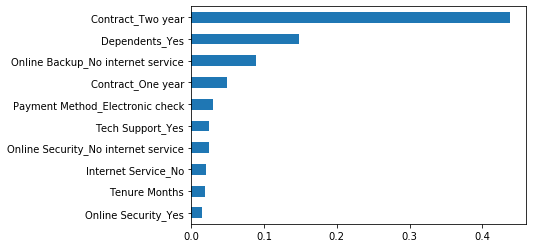

In [132]:
#XGBOOST

importances = xgb_model.feature_importances_

weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [107]:

param_grid = {
    'max_depth' : [3,4,5],
    'learning_rate' : [0,1,0.01,0.05],
    'gamma' : [0,0.25,1.0],
    'reg_lambda' : [0,1.0,10.0],
    'scale_pos_weight' : [1,3,5]
}


XGBOOST = GridSearchCV(XGBClassifier(objetctive='binary:logistic'),param_grid =param_grid, cv=10, scoring="roc_auc", n_jobs= -1, verbose = 1)


XGBOOST.fit(X_sm, y_sm)

XGBOOST.best_params_

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


C:\Users\oscar\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { objetctive } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'gamma': 0,
 'learning_rate': 1,
 'max_depth': 5,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

In [90]:

svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 100,200]}

gsSVMC = GridSearchCV(svclassifier,param_grid = svc_param_grid, cv=5, scoring="roc_auc", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(degree=8, kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 200], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='roc_auc', verbose=1)

In [91]:
gsSVMC.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}